In [1]:
import numpy as np
import matplotlib.pyplot as plt
from labjack import ljm as lj
import time
from IPython.display import clear_output

In [2]:
# This line just opens the first LabJack T7 that it finds over ethernet or USB
handle = lj.openS("T7", "ANY")

In [3]:
# Simple function to set up a channel to be read
# 199 is the single ended AIN
# range 10 means -10 to +10 V
# 0 is the base resolution
# argument channel is just the choice of analog input channel 0-13 on a non multiplexed LJ
def setup_channel(channel):
    numFrames = 3
    names = ["AIN"+str(channel)+"_NEGATIVE_CH", "AIN"+str(channel)+"_RANGE", "AIN"+str(channel)+"_RESOLUTION_INDEX"]
    aValues = [199, 10, 0]
    lj.eWriteNames(handle, numFrames, names, aValues)
    return

In [4]:
# Just queries the data from that AIN
def read_channel(channel):
    value = lj.eReadName(handle,"AIN"+str(channel))
    return value

In [5]:
# Functions for the thermistor readout setup I described
B = 3375
def V_to_R(v):
    r = 10000.*(np.abs(v)/(5.-np.abs(v)))
    return r
def R_to_T(R):
    T = (np.log(R/10000)/B+1/298)**-1
    T = T-273
    return T

In [6]:
scans = 500 #number of scans 
resolution = 0.02 #in seconds
# scan time = scans*resolution

#channels = np.arange(48, 55) # excludes final int
#channels = np.arange(67, 74)
#channels = np.arange(86, 96)
#channels = np.arange(104, 113)
channels = np.arange(122, 128)

temps = np.zeros((len(channels),scans))
for channel in channels: setup_channel(channel)

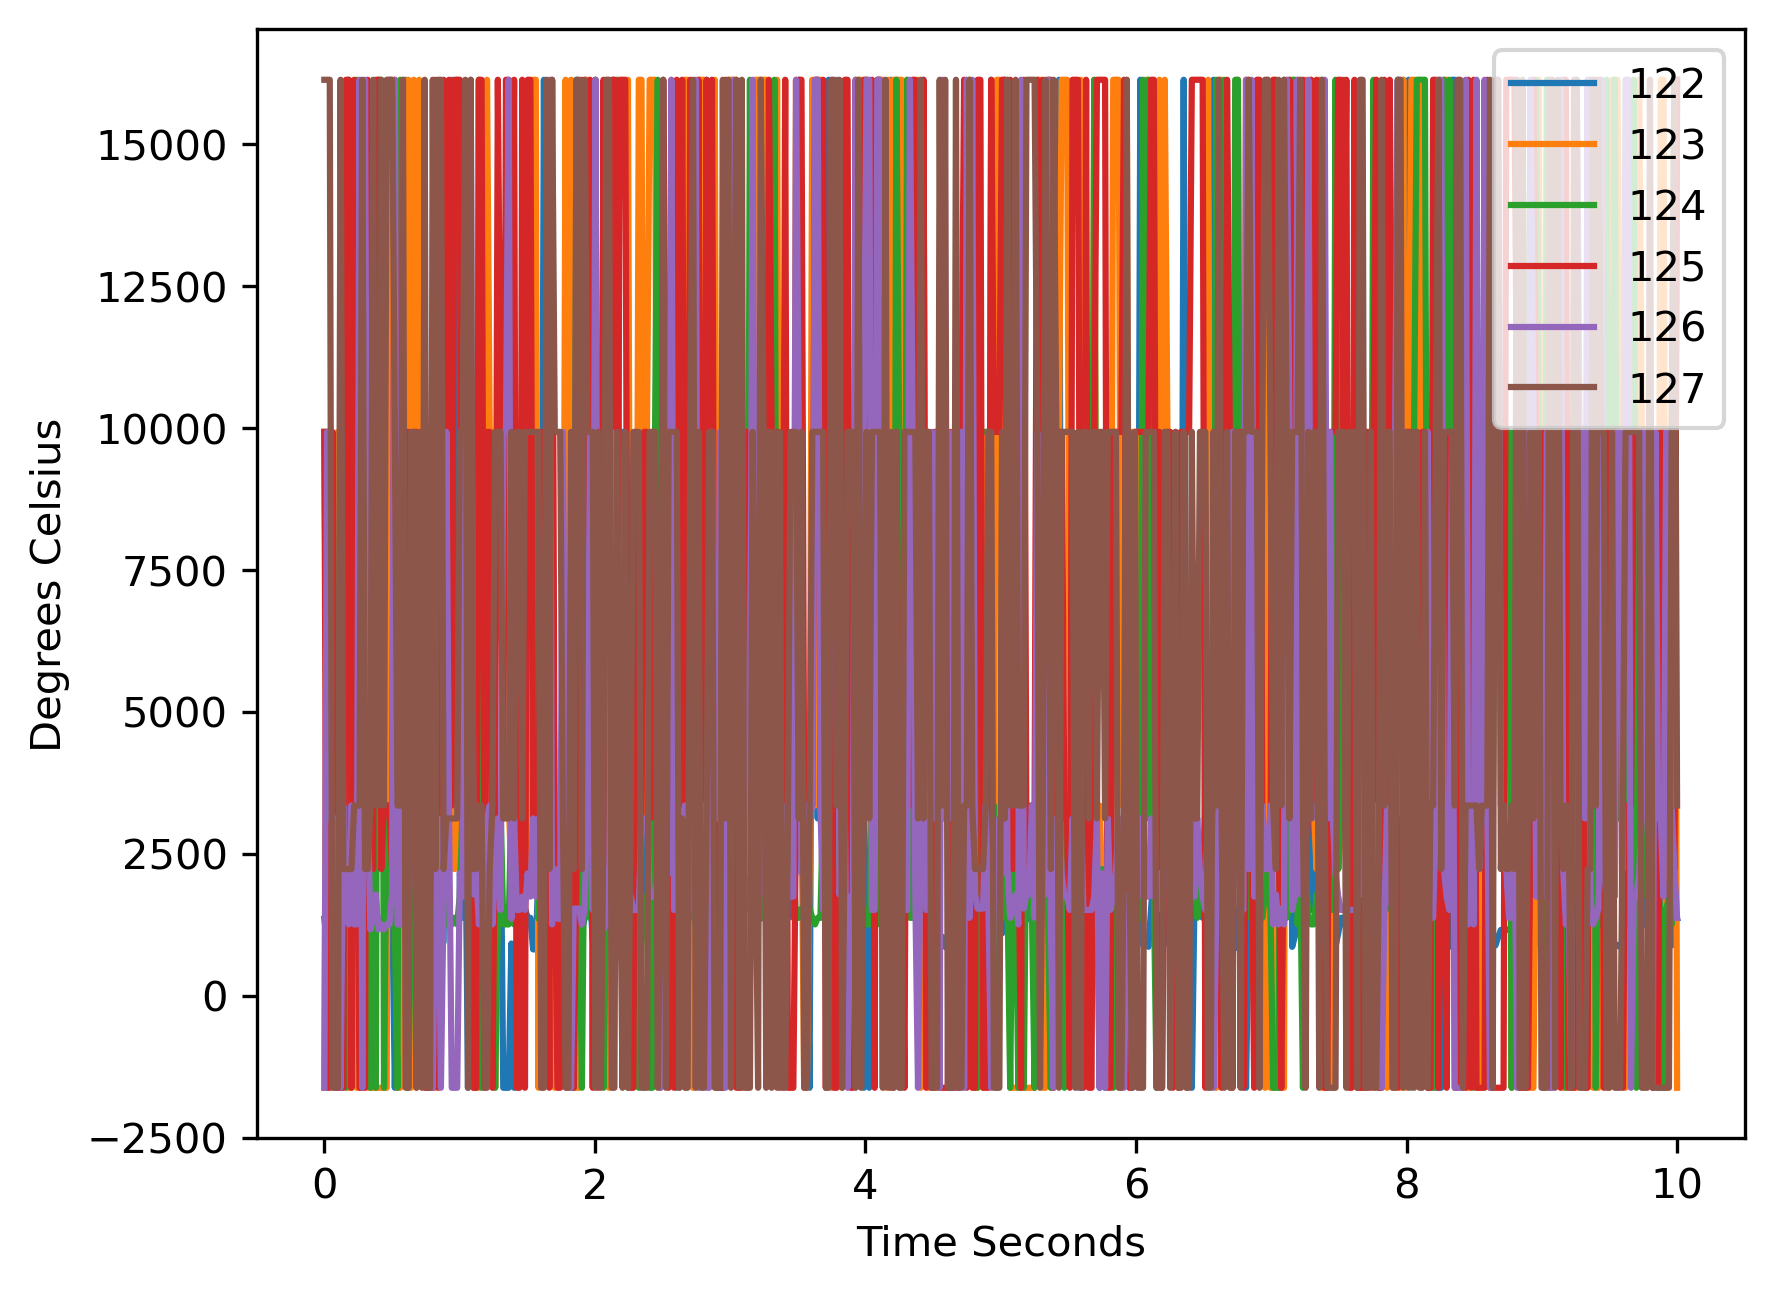

In [7]:
count = 0

while(count < scans):
    #clear_output()
    for i, channel in enumerate(channels): temps[i][count] = R_to_T(V_to_R(read_channel(channel)))
    time.sleep(resolution)
    count += 1

plt.figure(dpi = 300)
for i,channel in enumerate(channels):
    plt.plot(np.linspace(0,scans,scans)*resolution, temps[i], label = channel)
plt.legend()
plt.ylabel("Degrees Celsius")
plt.xlabel("Time Seconds")

#plt.ylim(0,50)
#print (temps[0])
temps = np.zeros((len(channels),scans))

In [8]:
"""
1600 for 4x9
800 for 3x8
"""

'\n1600 for 4x9\n800 for 3x8\n'